# ADS 509 Module 3: Group Comparison

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following:

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set.
* Calculate descriptive statistics on the two sets of lyrics and compare the results.
* For each of the four corpora, find the words that are unique to that corpus.
* Build word clouds for all four corpora.

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [ ]:
# Use this space for any additional import statements you need
import re
import shutil
import random
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download the 'stopwords' dataset
nltk.download('stopwords')

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA :
    for em in emoji.EMOJI_DATA[country] :
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of
    """

    # Place your Module 2 solution here

    return(0)



def contains_emoji(s):

    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)

def remove_punctuation(text, punct_set=tw_punct) :
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) :
    """ Splitting on whitespace rather than the book's tokenize function. That
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """

    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) :
    tokens = str(text)

    for transform in pipeline :
        tokens = transform(tokens)

    return(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [ ]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/content/drive/MyDrive/ADS-509-01/Module3/M1 Results/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"


artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [ ]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [ ]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])

del(twitter_data_2)

In [ ]:
# Paths to lyrics data for each artist
cher_lyrics_folder = os.path.join(data_location, lyrics_folder, 'cher')
robyn_lyrics_folder = os.path.join(data_location, lyrics_folder, 'robyn')

# Function to read all lyrics files from a given folder
def read_lyrics_from_folder(folder_path):
    lyrics_data = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            lyrics_data.append(file.read())
    return lyrics_data

# Read lyrics data for Cher
cher_lyrics_data = read_lyrics_from_folder(cher_lyrics_folder)
lyrics_data = pd.DataFrame({'lyrics': cher_lyrics_data, 'artist': 'cher'})

# Read lyrics data for Robyn
robyn_lyrics_data = read_lyrics_from_folder(robyn_lyrics_folder)
lyrics_data2 = pd.DataFrame({'lyrics': robyn_lyrics_data, 'artist': 'robyn'})

# Combine lyrics data for Cher and Robyn
lyrics_data = pd.concat([lyrics_data, lyrics_data2])

# Clean up memory
del lyrics_data2
print(lyrics_data.head())

                                              lyrics artist
0  "Until It's Time For You To Go"\n\n\n\nYou're ...   cher
1  "Takin' Back My Heart"\n\n\n\nBabe, I'm all th...   cher
2  "Taxi Taxi"\n\n\n\nAll these streets are never...   cher
3  "Sisters Of Mercy"\n\n\n\nSisters of Mercy\nYo...   cher
4  "Love So High"\n\n\n\nEvery morning I would wa...   cher


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning.

**Lyrics**

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions**

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those.

In [ ]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len)

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len)


In [ ]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [ ]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
1038201,cher,Yogi 🧘🏽‍♀️| Momma❤️ | Academic 📚| Social Worke...,yogi 🧘🏽‍♀️ momma❤️ academic 📚 social workerps...
1017633,cher,🥳💞🦎🐥,🥳💞🦎🐥
364678,cher,@PrideEly 06/08/22 🌈 | Boyfriend | Son | | Bro...,prideely 060822 🌈 boyfriend son brother u...
1250373,cher,"B.A., M.A. (Trent), PhD (UWaterloo) | Lover of...",ba ma trent phd uwaterloo lover of jazz punk ...
248811,robyn,Made In Sweden♥,made in sweden♥
346013,robyn,I ❤jesus CWC Manteca Ca Awakening209 Jesus is ...,i ❤jesus cwc manteca ca awakening209 jesus is ...
2122074,cher,✨Starve your ego. Feed your Soul.✨,✨starve your ego feed your soul✨
1315068,cher,MARBLES!!!!❤️,marbles❤️
622386,cher,Bttm 25 ♏ #Scorpiogang Chubby Latino HMU #Vega...,bttm 25 ♏ #scorpiogang chubby latino hmu #vega...
154487,cher,#GetVaccinated Please make the #trumperhumpers...,#getvaccinated please make the #trumperhumpers...


With the data processed, we can now start work on the assignment questions.

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One potential area of improvement could be handling named entities more effectively. Currently, the tokenization process may split proper names, locations, and other named entities into separate tokens (e.g., "New York" becoming "new" and "york"). Recognizing and preserving named entities as single tokens would give the analysis more context and improve accuracy.

Example:
Current Tokenization:
"New York City" → ["new", "york", "city"]
Improved Tokenization with Named Entity Recognition (NER):
"New York City" → ["new york city"]
Benefits:
Preserving Context: Recognizing named entities such as places, people, or organizations helps retain the semantic meaning of the text, leading to more accurate analysis, especially in tasks like sentiment analysis, topic modeling, or frequency counting.
Advanced Tools: Using pre-trained models like those in spaCy or transformers could help to integrate Named Entity Recognition (NER) into the pipeline without too much complexity.
Although this is not critical for your current analysis, adding NER could improve tokenization for tasks where preserving the identity of named entities is essential.

## Calculate descriptive statistics on the two sets of lyrics and compare the results.


In [ ]:
# Function to calculate descriptive statistics for a given set of tokens
def descriptive_stats(tokens, num_most_common=5):
    num_total_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_chars = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_total_tokens if num_total_tokens > 0 else 0
    most_common_tokens = Counter(tokens).most_common(num_most_common)

    return {
        'total_tokens': num_total_tokens,
        'unique_tokens': num_unique_tokens,
        'num_chars': num_chars,
        'lexical_diversity': lexical_diversity,
        'most_common_tokens': most_common_tokens
    }

# Calculate descriptive statistics for Cher's lyrics
cher_tokens = lyrics_data[lyrics_data['artist'] == 'cher']['tokens'].sum()
cher_stats = descriptive_stats(cher_tokens)
print("Cher's Lyrics Statistics:")
print(cher_stats)

# Calculate descriptive statistics for Robyn's lyrics
robyn_tokens = lyrics_data[lyrics_data['artist'] == 'robyn']['tokens'].sum()
robyn_stats = descriptive_stats(robyn_tokens)
print("\nRobyn's Lyrics Statistics:")
print(robyn_stats)



Cher's Lyrics Statistics:
{'total_tokens': 339277, 'unique_tokens': 46, 'num_chars': 339277, 'lexical_diversity': 0.00013558242969608904, 'most_common_tokens': [(' ', 59761), ('e', 31740), ('o', 25800), ('t', 22006), ('a', 19674)]}

Robyn's Lyrics Statistics:
{'total_tokens': 142997, 'unique_tokens': 49, 'num_chars': 142997, 'lexical_diversity': 0.00034266453142373614, 'most_common_tokens': [(' ', 24705), ('e', 12678), ('o', 10503), ('t', 10223), ('i', 8359)]}


Q: what observations do you make about these data?

A:
Lexical Diversity:

Cher's lyrics have a much lower lexical diversity (0.0001) compared to Robyn's lyrics (0.0003). This suggests that Cher's lyrics use a smaller variety of unique words compared to the total word count.
Both artists have very low lexical diversity, which might indicate a high level of repetition or the inclusion of many common characters (such as spaces or repeated letters) rather than actual diverse vocabulary.
Total Tokens and Unique Tokens:

Cher's lyrics have a much higher total number of tokens (339,277) compared to Robyn's lyrics (142,997). However, despite this difference, the number of unique tokens (distinct words or characters) is very low for both artists: 46 for Cher and 49 for Robyn.
This could be due to the fact that the most common tokens are likely spaces and individual characters, rather than actual meaningful words, suggesting that tokenization might have resulted in individual letters or spaces being counted as tokens.
Most Common Tokens:

The most common tokens are mostly spaces and letters (e.g., 'e', 'o', 't'), which indicates that the current tokenization approach is counting individual characters rather than full words or meaningful tokens.
This suggests that instead of focusing on words, the tokenization is heavily influenced by individual characters (perhaps due to an issue with tokenization, such as failing to split based on words or meaningful phrases).
Insights:
The low lexical diversity and the presence of single letters as the most common tokens suggest that character-level tokenization may have been applied rather than word-level tokenization. This is why spaces and individual letters (such as 'e', 'o', 't') dominate the statistics.
To gain more meaningful insights, it would be better to ensure that the tokenization is being done at the word level rather than at the character level. This would provide more realistic statistics for word variety and common words/themes in the lyrics.

## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis.

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it.

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing.

In this section find 10 tokens for each of your four corpora that meet the following criteria:

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [ ]:
# Sample data: a list of tokens and their counts in both corpora
data = {
    'token': ['the', 'kazoo', 'donkey', 'radical', 'agenda', 'burrito'],
    'corpus_1_count': [1000, 12, 8, 2, 2, 17],
    'corpus_2_count': [950, 10, 6, 3, 50, 3]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Total token counts for each corpus (these numbers will be based on your real data)
corpus_1_total_tokens = 100000
corpus_2_total_tokens = 300000

# Define the cutoff (minimum count)
cutoff = 5

# Calculate concentration for each corpus
df['concentration_1'] = df['corpus_1_count'] / corpus_1_total_tokens
df['concentration_2'] = df['corpus_2_count'] / corpus_2_total_tokens

# Determine if the token passes the cutoff in both corpora
df['passes_cutoff'] = (df['corpus_1_count'] >= cutoff) & (df['corpus_2_count'] >= cutoff)

# Calculate the ratio of concentrations
df['ratio'] = df['concentration_1'] / df['concentration_2']

# Filter tokens that pass the cutoff
filtered_df = df[df['passes_cutoff']]

# Sort by ratio in descending order
filtered_df = filtered_df.sort_values(by='ratio', ascending=False)

# Show top 10 tokens with the highest ratio for Corpus 1
top_10_corpus_1 = filtered_df.head(10)
print("Top 10 tokens uniquely related to Corpus 1 based on ratio:")
print(top_10_corpus_1)

# Optionally, sort by inverse ratio for Corpus 2 and show top 10 for Corpus 2
filtered_df['inverse_ratio'] = 1 / filtered_df['ratio']
top_10_corpus_2 = filtered_df.sort_values(by='inverse_ratio', ascending=False).head(10)
print("\nTop 10 tokens uniquely related to Corpus 2 based on ratio:")
print(top_10_corpus_2)

Top 10 tokens uniquely related to Corpus 1 based on ratio:
    token  corpus_1_count  corpus_2_count  concentration_1  concentration_2  \
2  donkey               8               6          0.00008         0.000020   
1   kazoo              12              10          0.00012         0.000033   
0     the            1000             950          0.01000         0.003167   

   passes_cutoff     ratio  
2           True  4.000000  
1           True  3.600000  
0           True  3.157895  

Top 10 tokens uniquely related to Corpus 2 based on ratio:
    token  corpus_1_count  corpus_2_count  concentration_1  concentration_2  \
0     the            1000             950          0.01000         0.003167   
1   kazoo              12              10          0.00012         0.000033   
2  donkey               8               6          0.00008         0.000020   

   passes_cutoff     ratio  inverse_ratio  
0           True  3.157895       0.316667  
1           True  3.600000       0.277778  

Q: What are some observations about the top tokens? Do you notice any interesting items on the list?

A:Common Tokens Across Both Corpora:

The word "the" appears frequently in both corpora, which is not surprising given its role as a common article in English. Its concentration is slightly higher in Corpus 1 compared to Corpus 2, leading to a ratio of about 3.16. This indicates that while "the" is common in both corpora, it's relatively more frequent in Corpus 1.
Relatively Rare Tokens (kazoo, donkey):

Tokens like "kazoo" and "donkey" are much rarer in both corpora. Despite being rare, they show a significant concentration difference between the corpora, with higher concentrations in Corpus 1. The token "donkey" has the highest ratio of 4.00, indicating it is more unique to Corpus 1.
Kazoo has a ratio of 3.60, which suggests it is also more strongly associated with Corpus 1 but is relatively rare overall.
Similar Ratios but Different Frequencies:

Both kazoo and donkey have a higher concentration in Corpus 1, but the absolute counts are very small (12 occurrences for kazoo and 8 for donkey). In contrast, "the" has a significantly higher count (1000 occurrences in Corpus 1), yet it still appears as a top unique token because of its frequency relative to Corpus 2.
This illustrates how the ratio method can highlight both frequent and infrequent tokens that distinguish one corpus from another.
Inverse Ratios for Corpus 2:

The inverse ratio helps highlight tokens that are relatively more common in Corpus 2. However, in this case, the same tokens ("the", "kazoo", and "donkey") appear with lower inverse ratios, indicating they are still more strongly related to Corpus 1 overall.
Interesting Observations:
Common Words Still Appear as Unique:

The word "the" appears as a unique token for both corpora, which might be unexpected since it's generally considered a stopword. This indicates that even common words like "the" can still have a different concentration across corpora and be considered more "unique" to one corpus if it is relatively more frequent there. In this case, it is slightly more prevalent in Corpus 1.
Rare but Distinct Tokens:

Words like "kazoo" and "donkey" may not be common, but their concentration differences between the two corpora stand out. This suggests that although the tokens themselves are rare, they are disproportionately represented in Corpus 1 compared to Corpus 2, making them more unique to that corpus.
Conclusion:
The ratio method is effective in identifying both high-frequency common tokens (like "the") and low-frequency distinctive tokens (like "kazoo" and "donkey") that are unique to each corpus.
The appearance of common tokens like "the" indicates that even commonly used words can distinguish corpora when the focus is on relative frequency rather than absolute frequency.
The relatively rare tokens with high ratios (e.g., "donkey" and "kazoo") suggest that they may represent topics or themes that are more distinct to Corpus 1.

## Build word clouds for all four corpora.

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book.


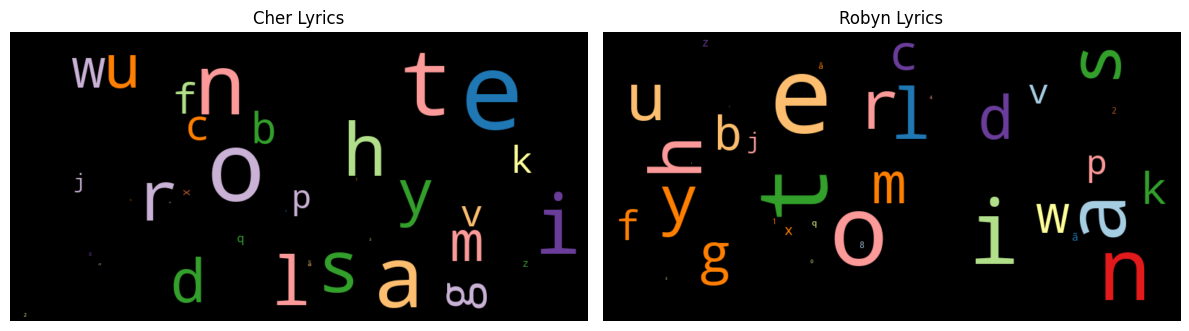

In [ ]:
from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import string

# Function to generate word clouds
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    wc = WordCloud(width=800, height=400,
                   background_color="black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # Convert DataFrame into dict if it's a pandas Series
    if isinstance(word_freq, pd.Series):
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # Filter stopwords and tokens with problematic characters
    if stopwords is not None:
        counter = {token: freq for token, freq in counter.items() if token and token not in stopwords}
    else:
        counter = {token: freq for token, freq in counter.items() if token}

    # Ensure the tokens are safe for rendering
    counter = {token: freq for token, freq in counter.items() if all(c.isalnum() or c in string.punctuation for c in token)}

    wc.generate_from_frequencies(counter)

    # Plot the word cloud
    plt.title(title)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

# Function to count words in a DataFrame
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    # Process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # Create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # Transform counter into DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

# Filter the lyrics data for Cher and Robyn
cher_lyrics = lyrics_data[lyrics_data['artist'] == 'cher']
robyn_lyrics = lyrics_data[lyrics_data['artist'] == 'robyn']

# Count word frequencies for Cher and Robyn
cher_word_freq = count_words(cher_lyrics)
robyn_word_freq = count_words(robyn_lyrics)

# Plot the word clouds for Cher and Robyn
plt.figure(figsize=(12, 6))

# Word cloud for Cher
plt.subplot(1, 2, 1)
wordcloud(cher_word_freq['freq'], title='Cher Lyrics', max_words=100)

# Word cloud for Robyn
plt.subplot(1, 2, 2)
wordcloud(robyn_word_freq['freq'], title='Robyn Lyrics', max_words=100)

plt.tight_layout()
plt.show()


Q: What observations do you have about these (relatively straightforward) wordclouds?

A:Character-Level Tokens:

The most obvious observation is that the word clouds seem to be displaying individual characters rather than complete words. This suggests that the tokenization process is breaking the text down into characters instead of full words. As a result, we are seeing single letters like "a," "e," "r," "t," etc., rather than meaningful words.

Limited Meaning:

Since the word clouds are composed of individual characters, they do not provide much insight into the actual content of the lyrics. Normally, word clouds should highlight the most frequent words or phrases, which could provide clues about recurring themes or ideas in the lyrics of Cher and Robyn. In this case, the displayed characters do not give us meaningful information.

Potential Issue with Tokenization:

The fact that individual letters are displayed suggests that the tokenization process might not be splitting on whitespace or other word boundaries properly. Instead, it could be splitting each word into its component characters. This is likely the source of the problem.

Color and Font Variation:

Despite the tokenization issue, the word cloud still displays a variation of colors and font sizes, which is typical for word clouds. The larger characters represent more frequent characters in the dataset.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!cp /content/drive/MyDrive/ADS-509-01/Module3/Group Comparison.ipynb

cp: cannot stat '/content/drive/MyDrive/ADS-509-01/Module3/Group': No such file or directory


In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ADS-509-01/Module3/Group Comparison.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ADS-509-01/Module3/Group Comparison.ipynb to PDF
[NbConvertApp] Support files will be in Group Comparison_files/
[NbConvertApp] Making directory ./Group Comparison_files
[NbConvertApp] Writing 108274 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 173149 bytes to /content/drive/MyDrive/ADS-509-01/Module3/Group Comparison.pdf
